In [27]:
import numpy
import pandas
import matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sum', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
data = loadtxt('AVD08dayli_Tromso.DAT') # файл содержащий значения foF2, за день 
N = len(data) # количество дней 
Ni = int(N/2)
t = arange(0,N) # количество дней
a = arange(1, Ni) # параметр 
b = arange(0, N) # параметр 

In [29]:
#data

In [30]:
#функция вейвлет преобразования Морле
def morley(x):
    m = real(exp(-x**2/2)*exp(1j*2*pi*x))
    return m

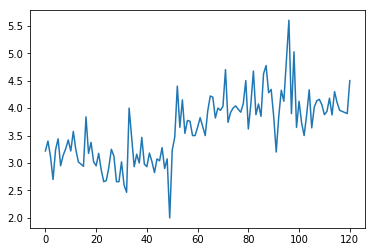

In [31]:
foF2av = mean(data[:,1]) # среднее значение foF2 за данный промежуток 
foF2 = data[:,1]
#foF2 = data[:,1]
#for i in range(0,N-1):
   # foF2[i+1] = data[i+1,1] -data[i,1]
plot(foF2)

In [32]:
# Вейвлет преобразование Морле
Np = 30
WA = np.zeros(Np*N).reshape(Np,N)
for i in range(1,Np):
    for j in range(0,N):
        sum = 0
        for e in range(0,N):
            sum = sum + (foF2[e] - foF2av)*morley((t[e]-b[j])/a[i])
        WA[i,j] = sum/a[i]

In [33]:
WA

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.13228013,  0.07161185,  0.00813665, ...,  0.21960813,
        -0.3188565 ,  0.36948463],
       [-0.20953076,  0.13642753,  0.13563587, ..., -0.09479755,
        -0.12342505,  0.25543509],
       ..., 
       [-0.05440201, -0.05943908, -0.06066132, ...,  0.08720921,
         0.081055  ,  0.07050582],
       [-0.04286837, -0.04718159, -0.0486449 , ...,  0.07931432,
         0.07502844,  0.06681403],
       [-0.03322494, -0.03760952, -0.03991029, ...,  0.07033596,
         0.06764577,  0.06150153]])

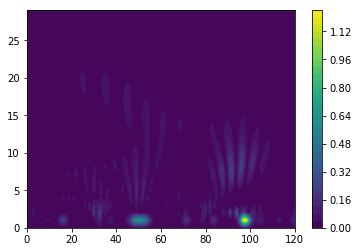

In [34]:
contourf((WA)**2, 35)
colorbar()

In [35]:
# LIM метод
W = abs(WA)**2
LIM = np.zeros(Np*N).reshape(Np,N)

#print(W)
for i in range(1,Np):
    S = np.mean(W[i,:])
    #print(S)
    for j in range(0,N):
        LIM[i,j] = W[i,j]/S

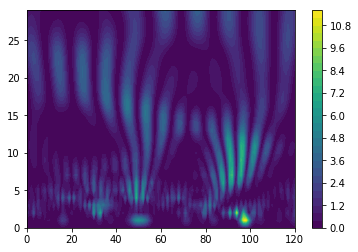

In [36]:
contourf(LIM, 35)
colorbar()

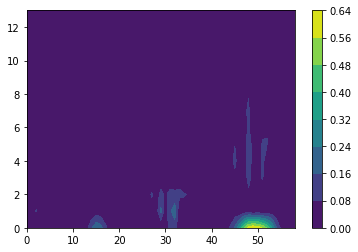

In [37]:
contourf(W[1:15, 1:60])
colorbar()

In [38]:
# Построчное заполнение массива посчитанными данными
k = 0
data = zeros(3*Np*N).reshape(Np*N,3)    # Массив данных, для использования в Surfer
for i in range(1,Np):                   # Цикл для записси периодов коэффициентов FoF2
    for j in range(1,N):                # Цикл для записи дней
        data[k,0] = j                   # Дни
        data[k,1] = i                   # Периоды
        data[k,2] = LIM[i,j]            # Коэффиценты FoF2
        k = k+1                         # Счётчик строк
savetxt("LIM_2008_Tromso.dat", data)

In [39]:
#data